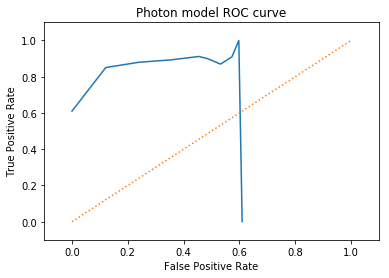

In [2]:
%matplotlib inline

# # MATLAB Project 2 - Question 3
# #### Shalin Patel and Krishna Thiyagarajan
# #### ECE-302: Probability Models & Stochastic Processes 
# #### Professor Sam Keene
# #### April 18, 2018

import numpy as np
import math
import matplotlib.pyplot as plt
import random
from sklearn import metrics

# returns likelihood ratio of two exponential distributions for a given value
def exp_likelihood_ratio(x, l_1, l_0):
    val = (l_1/l_0)*math.exp( (l_0 - l_1) * x)
    return val

# returns tuple of (true positive rate, false positive rate)
def compute_ROC(predictions, actual_data):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(predictions)):
        if actual_data[i] == predictions[i] == 1:
            TP += 1
        if actual_data[i] == predictions[i] == 0:
            TN += 1
        if actual_data[i] == 1 and predictions[i] == 0:
            FP += 1
        if actual_data[i] == 0 and predictions[i] == 1:
            FN += 1
    if TP == 0:
        TPR = 0
    else:
        TPR = TP/(TP+FN)
    if FP == 0:
        FPR = 0
    else:
        FPR = FP/(FP+TN)
    return (TPR,FPR)

lambda_1 = 0.05
lambda_0 = 0.005
data_size = 100
data = []
for i in range(data_size):
    data.append(random.randint(0,1))
# data = [1,1,0,1,0,1,0,0,0,0,1,1,0] # data being transmitted (generated randomly)

signal = [1] # start off with photon transmitted
for value in data:
    # find time until next photon arrival
    if value == 1:
        sample = np.random.exponential(scale=(1/lambda_1))
    else:
        sample = np.random.exponential(scale=(1/lambda_0))
    event_time = int(math.ceil(sample))

    # update signal with new photon arrival
    for i in range(event_time-1):
        signal.append(0)
    signal.append(1)

thresholds = np.linspace(0, lambda_1/lambda_0,num=10)
event_time = 0
TPR_vals = []
FPR_vals = []
for threshold in thresholds:
    predicted_data = []
    for point in signal[1:]:
        if point == 1:
            event_time += 1
            ratio = exp_likelihood_ratio(event_time, lambda_1, lambda_0)
            if ratio >= threshold:
                predicted_data.append(1)
            else:
                predicted_data.append(0)
            event_time = 0 # reset event_time
        else:
            event_time +=1
    TPR,FPR = compute_ROC(predicted_data, data)
    TPR_vals.append(TPR)
    FPR_vals.append(FPR)

yx = [0,1]
plt.figure()
plt.plot(FPR_vals, TPR_vals)
plt.plot(yx,yx, linestyle='dotted')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Photon model ROC curve")
plt.show()
